# Validation

## Single wake validation cases

### Define validation cases
Dictionary of different test cases available. 

In [1]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

In [2]:
import numpy as np
import matplotlib as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from py_wake.wind_turbines import OneTypeWindTurbines
from py_wake.site import UniformSite
# Single wake test cases 
swc = {}
swc['Wieringermeer-West'] = {'U0': 10.7, 'CT': 0.63, 'TItot': 0.08, 'D': 80.0,
        'zH': 80.0, 'xDown': np.array([2.5, 3.5, 7.5]), 'sDown':  80.0, 'location': 'onshore'}
swc['Wieringermeer-East'] = {'U0': 10.9, 'CT': 0.63, 'TItot': 0.06, 'D': 80.0,
        'zH': 80.0, 'xDown': np.array([2.5, 3.5, 7.5]), 'sDown':  80.0, 'location': 'onshore'}
swc['Nibe'] = {'U0': 8.5, 'CT': 0.89, 'TItot': 0.08, 'D': 40.0,
        'zH': 45.0, 'xDown': np.array([2.5, 4, 7.5]), 'sDown':  40.0, 'location': 'onshore'}
swc['Nordtank-500'] = {'U0': 7.45, 'CT': 0.70, 'TItot': 0.112, 'D': 41.0,
        'zH': 36.0, 'xDown': np.array([2, 5, 7.5]), 'sDown':  40.0, 'location': 'onshore'}
swc['NREL-5MW_TIlow'] = {'U0': 8.0, 'CT': 0.79, 'TItot': 0.04, 'D': 126.0,
        'zH': 90.0, 'xDown': np.array([2.5, 5, 7.5]), 'sDown':  126.0, 'location': 'offshore'}
swc['NREL-5MW_TIhigh'] = {'U0': 8.0, 'CT': 0.79, 'TItot': 0.128, 'D': 126.0,
        'zH': 90.0, 'xDown': np.array([2.5, 5, 7.5]), 'sDown':  126.0, 'location': 'onshore'}
# Setup a dummy site and the wind turbine definiton for the respective site
for case in swc.keys():
    swc[case]['site'] = UniformSite(p_wd=[0.5, 0.5],
                                          ti=swc[case]['TItot']/0.8,
                                          ws=swc[case]['U0']) 
    swc[case]['wt'] = OneTypeWindTurbines(name=case,
                                          diameter=swc[case]['D'],
                                          hub_height=swc[case]['zH'],
                                          ct_func=lambda ws: swc[case]['CT'],
                                          power_func=lambda ws: 1.0 ,
                                          power_unit='W')

### Run single wake validation cases 

In [3]:
# Load wake models 
from py_wake.deficit_models.noj import NOJDeficit, NOJLocalDeficit
from py_wake.deficit_models.gaussian import BastankhahGaussianDeficit, NiayifarGaussianDeficit, ZongGaussianDeficit
from py_wake.deficit_models.gcl import GCLDeficit
# Load run and plot functions 
from py_wake.validation.validation_lib import run_wms, plot_single_wake
# Define the test cases to run 
test_cases = ['Wieringermeer-West',
              'Wieringermeer-East',
              'Nibe',
              'Nordtank-500',
              'NREL-5MW_TIlow',
              'NREL-5MW_TIhigh']
# Define deficit models to test 
deficit_models=[NOJDeficit(), 
                NOJDeficit(k=0.04),
                NOJLocalDeficit(),     
                BastankhahGaussianDeficit(),
                NiayifarGaussianDeficit(),
                ZongGaussianDeficit(),
                GCLDeficit(),
                GCLDeficit(use_effective_ti=True)]
# Run test cases 
swc_out = run_wms(swc, test_cases=test_cases, deficit_models=deficit_models)

### Plot wake profiles 
Wake profiles that were computed in `run_wms` for the different deficit models and the sites can now be plotted. Profiles are shown for each reference site. 

<Figure size 432x288 with 0 Axes>

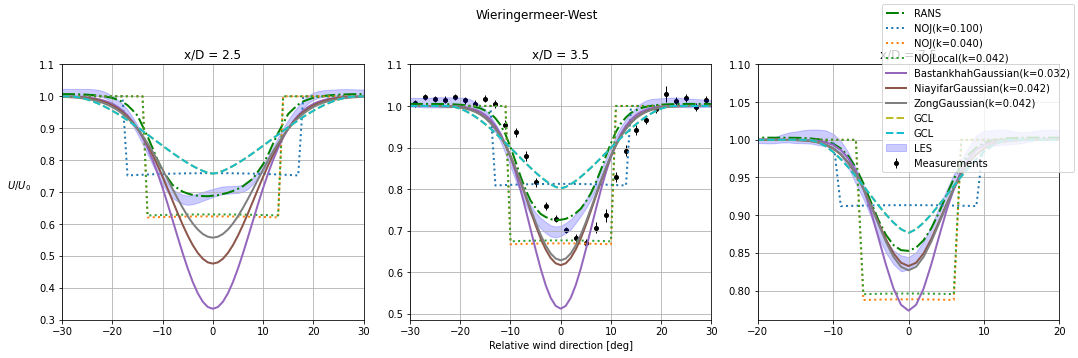

<Figure size 432x288 with 0 Axes>

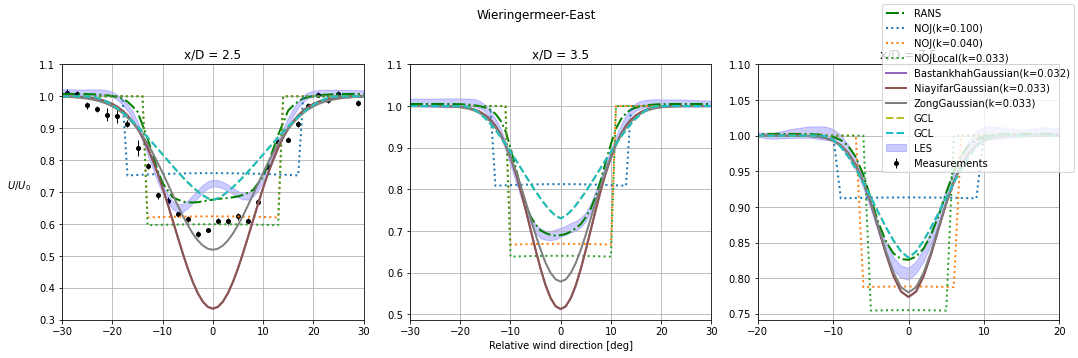

<Figure size 432x288 with 0 Axes>

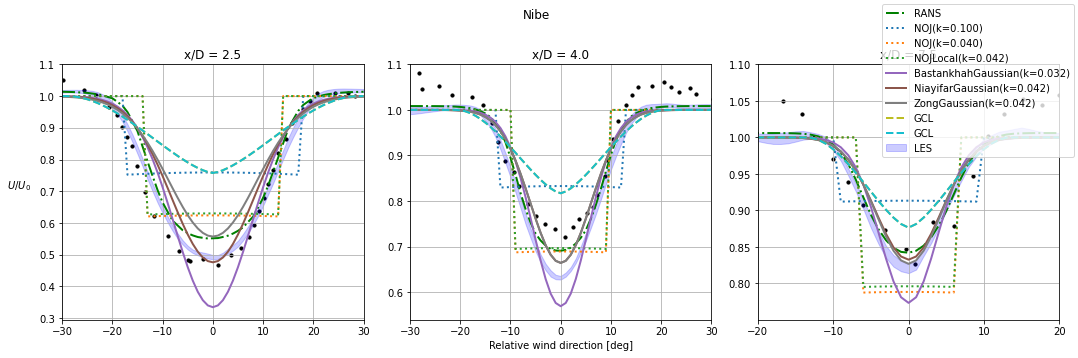

<Figure size 432x288 with 0 Axes>

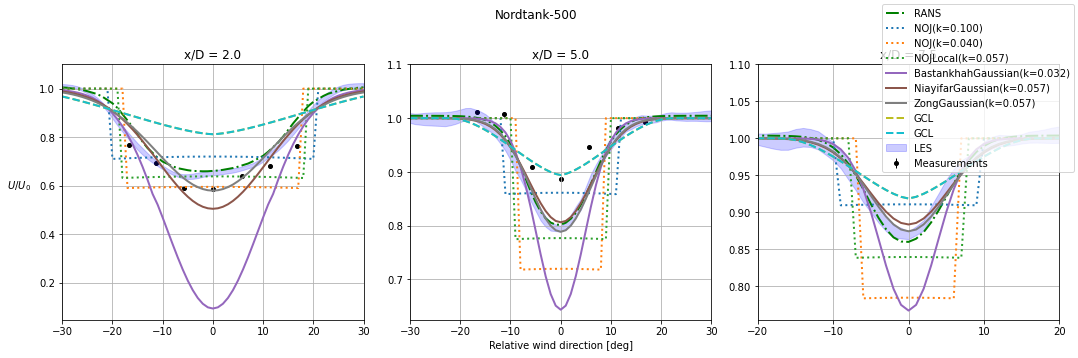

<Figure size 432x288 with 0 Axes>

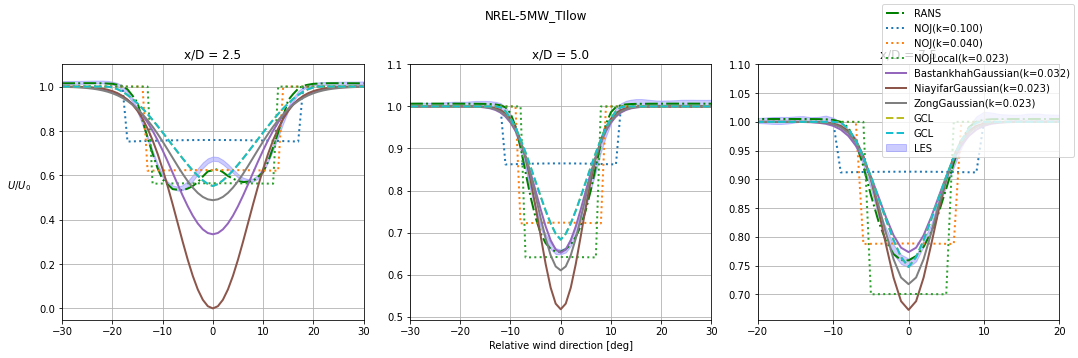

<Figure size 432x288 with 0 Axes>

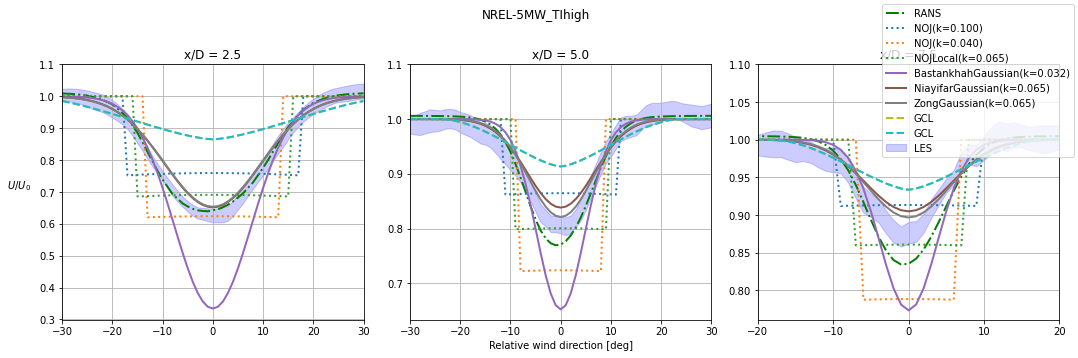

In [4]:
# Plot run output 
plot_single_wake(swc_out) 

### Plot momentum deficit
By integrating the velocity deficit the momentum deficit predicted by each model one can easily compare the overall performance of the different models in a bar plot. 

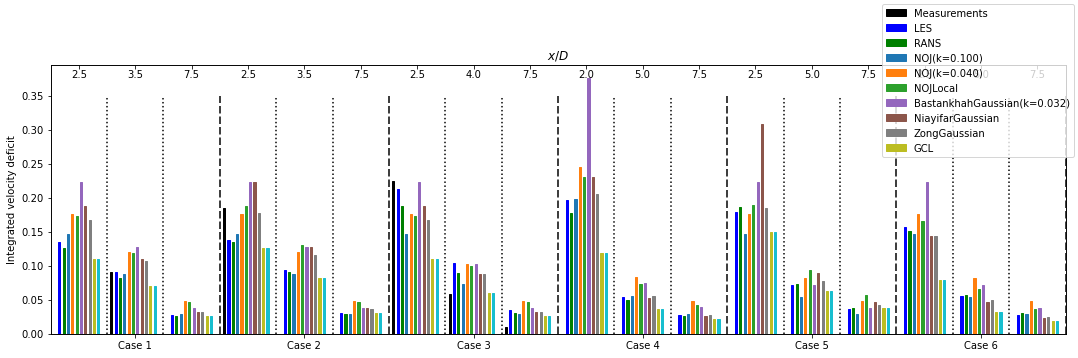

In [5]:
from py_wake.validation.validation_lib import plotbar_single_wake
plotbar_single_wake(swc_out)

## Wind farm wake cases

### Define validation cases 

In [6]:
from py_wake.examples.data.hornsrev1 import wt_x as wt_x_hr
from py_wake.examples.data.hornsrev1 import wt_y as wt_y_hr
from py_wake.examples.data.hornsrev1 import HornsrevV80, Hornsrev1Site
from py_wake.validation.ecn_wieringermeer import wt_x as wt_x_w
from py_wake.validation.ecn_wieringermeer import wt_y as wt_y_w
from py_wake.validation.ecn_wieringermeer import N80
from py_wake.validation.lillgrund import wt_x as wt_x_l
from py_wake.validation.lillgrund import wt_y as wt_y_l
from py_wake.validation.lillgrund import SWT2p3_93_65, LillgrundSite

#  If missing wind turbines need to be included in the plot, one should write np.nan in the wts list.
hr_inner_rows = np.linspace(0, 79, 80).reshape(10, 8)[:, 1:7].flatten(
).tolist()  # WTs representing the inner rows of Horns Rev 1
mwc = {}
mwc['Wieringermeer'] =  {'U0': 8.35, 'TItot': 0.096, 'wt': N80(), 'wt_x': wt_x_w, 'wt_y': wt_y_w, 'location': 'onshore',
                         'plots': [{'name': 'Row', 'wd': 275.0, 'wts': [0, 1, 2, 3, 4]}]}
mwc['Wieringermeer']['site'] = UniformSite(p_wd=[0.5, 0.5], ti=mwc['Wieringermeer']['TItot']/0.8, ws=mwc['Wieringermeer']['U0'])
mwc['Lillgrund'] = {'U0': 9.0, 'TItot': 0.048, 'wt': SWT2p3_93_65(), 'wt_x': wt_x_l, 'wt_y': wt_y_l, 'site': LillgrundSite(), 'location': 'offshore',
                    'plots': [{'name': 'RowB', 'wd': 222.0, 'wts': [14, 13, 12, 11, 10, 9, 8, 7]},                                     
                              {'name': 'RowD', 'wd': 222.0, 'wts': [29, 28, 27, np.nan, 26, 25, 24, 23]},
                              {'name': 'RowB', 'wd': 207.0, 'wts': [14, 13, 12, 11, 10, 9, 8, 7]},
                              {'name': 'RowD', 'wd': 207.0, 'wts': [29, 28, 27, np.nan, 26, 25, 24, 23]},
                              {'name': 'Row6', 'wd': 120.0, 'wts': [2, 9, 17, 25, 32, 37, 42, 46]},
                              {'name': 'Row4', 'wd': 120.0, 'wts': [4, 11, 19, np.nan, np.nan, 39, 44]},
                              {'name': 'Row6', 'wd': 105.0, 'wts': [2, 9, 17, 25, 32, 37, 42, 46]},
                              {'name': 'Row4', 'wd': 105.0, 'wts': [4, 11, 19, np.nan, np.nan, 39, 44]},
                              {'name': 'WFeff'}]}
mwc['Hornsrev1'] = {'U0': 8.0, 'TItot': 0.056, 'wt': HornsrevV80(), 'wt_x': wt_x_hr, 'wt_y': wt_y_hr, 'site': Hornsrev1Site(), 'location': 'offshore',
                    'plots': [{'name': 'InnerRowMean', 'wd': 270.0, 'wts': hr_inner_rows},
                              {'name': 'WFeff'}]}

### Define deficit model setups
Even though the deficit model determines largely the esitmated power production for a site, the auxillary models can have a pronounced influnece. Especially the superposition model is here a key driver. 

In [7]:
from py_wake.deficit_models.noj import NOJDeficit, NOJLocalDeficit
from py_wake.deficit_models.gaussian import BastankhahGaussianDeficit, NiayifarGaussianDeficit, ZongGaussianDeficit
from py_wake.deficit_models.gcl import GCLDeficit

from py_wake.superposition_models import SquaredSum, LinearSum, WeightedSum
from py_wake.rotor_avg_models import RotorCenter, GQGridRotorAvg
from py_wake.turbulence_models.stf import STF2017TurbulenceModel
# Define a number of different deficit setups to be tested
deficit_setup = [
                 {'deficit_model': NOJLocalDeficit(),
                 'superpositionModel': LinearSum(),
                 'rotorAvgModel': GQGridRotorAvg(4,3),
                 'turbulenceModel': STF2017TurbulenceModel()},    
                 {'deficit_model': GCLDeficit(use_effective_ws=True, use_effective_ti=True),
                 'superpositionModel': LinearSum(),
                 'rotorAvgModel': GQGridRotorAvg(4,3),
                 'turbulenceModel': STF2017TurbulenceModel()},     
                 {'deficit_model': ZongGaussianDeficit(),
                 'superpositionModel': WeightedSum(),
                 'rotorAvgModel': RotorCenter(),
                 'turbulenceModel': STF2017TurbulenceModel()},     
                ]     

### Run wind farm validation cases

In [8]:
from py_wake.validation.validation_lib import run_wfm, plot_wind_farm
mwc_out = run_wfm(mwc, test_cases=['Wieringermeer','Lillgrund','Hornsrev1'], 
                  deficit_setups=deficit_setup, gaussian_filter=False) 

AttributeError: 'GQGridRotorAvg' object has no attribute 'args4deficit'

### Plot wind farm results  

<Figure size 432x288 with 0 Axes>

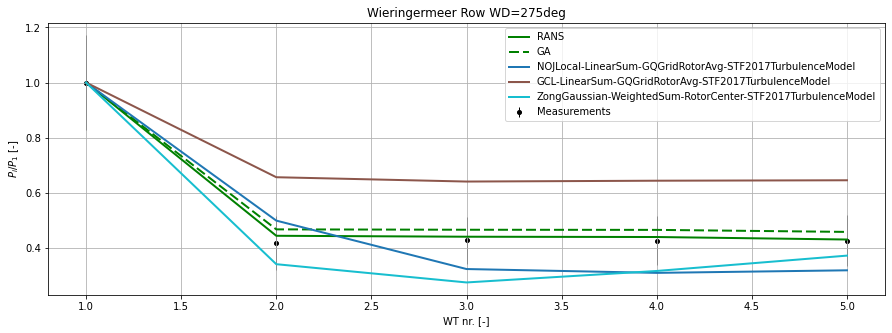

<Figure size 432x288 with 0 Axes>

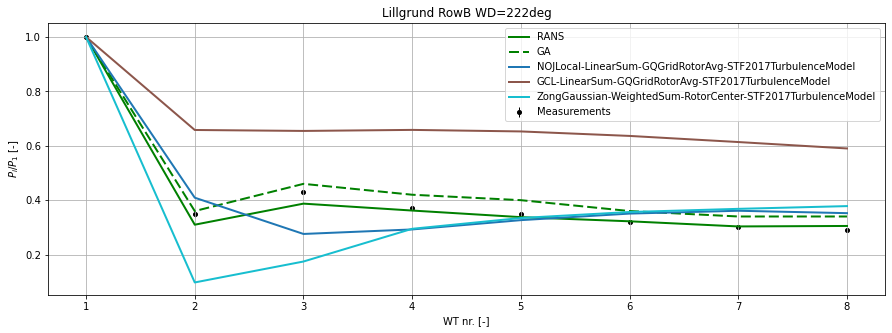

<Figure size 432x288 with 0 Axes>

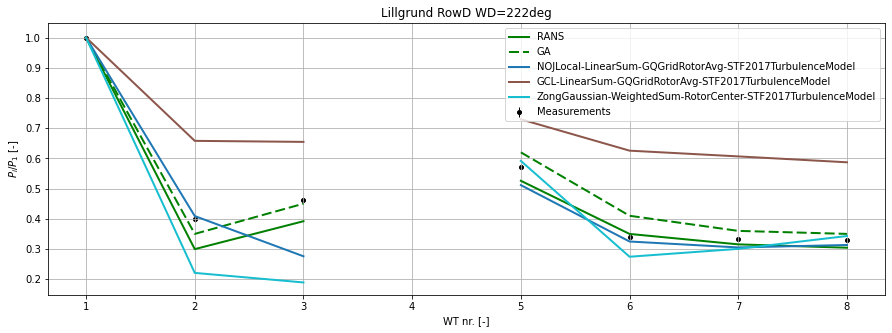

<Figure size 432x288 with 0 Axes>

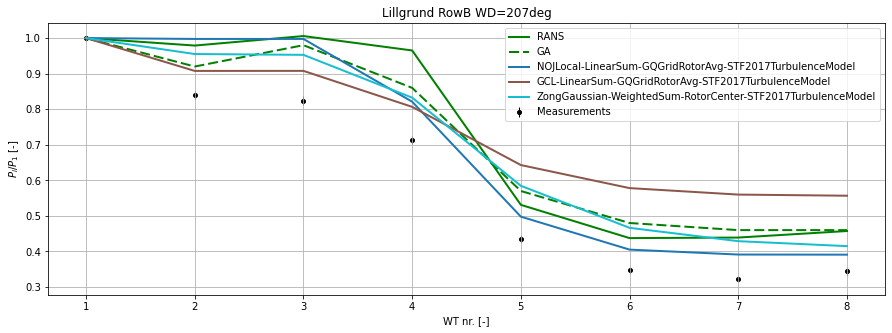

<Figure size 432x288 with 0 Axes>

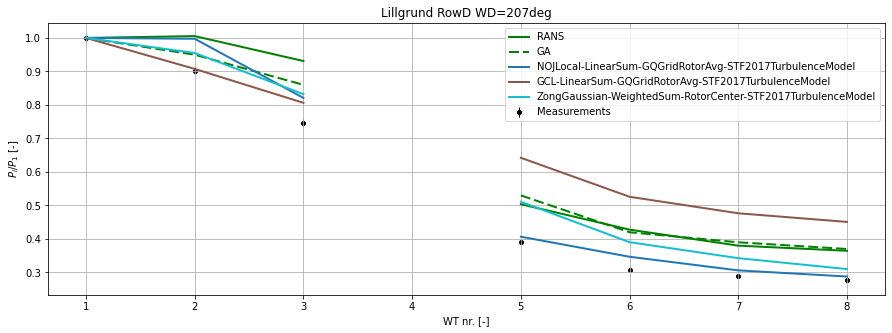

<Figure size 432x288 with 0 Axes>

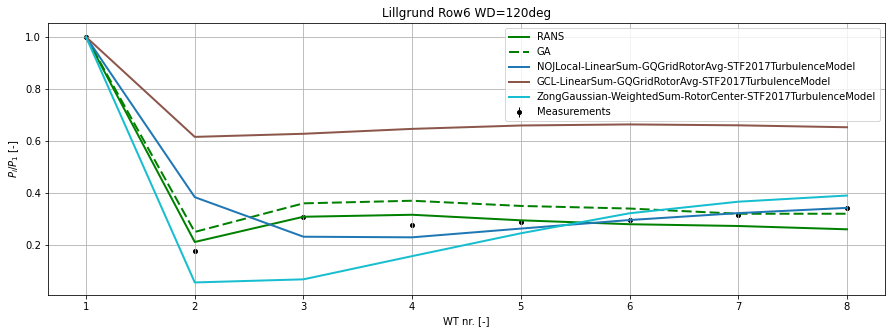

<Figure size 432x288 with 0 Axes>

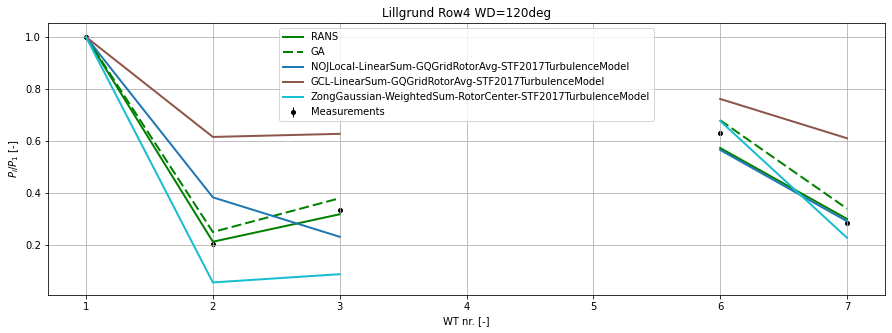

<Figure size 432x288 with 0 Axes>

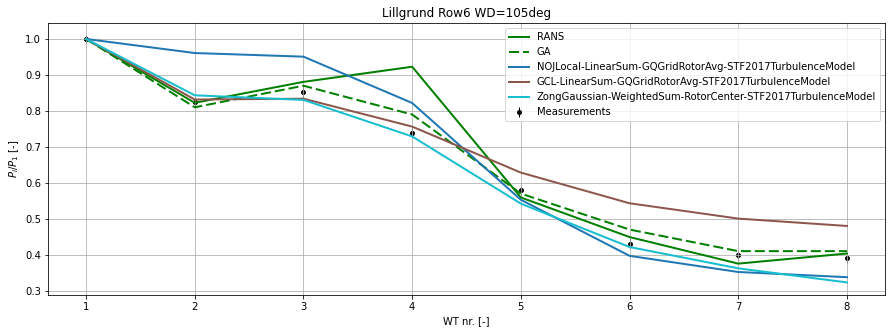

<Figure size 432x288 with 0 Axes>

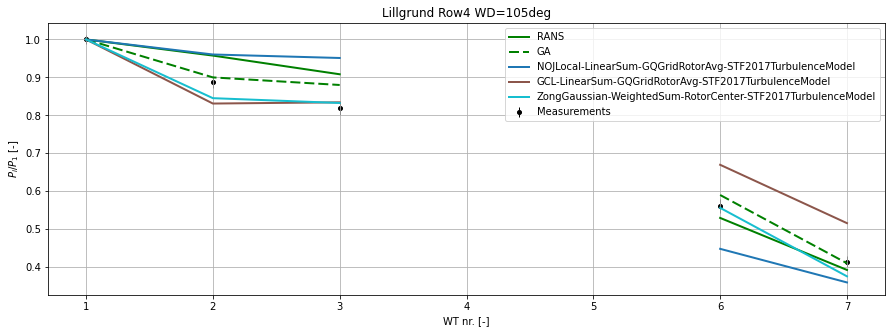

<Figure size 432x288 with 0 Axes>

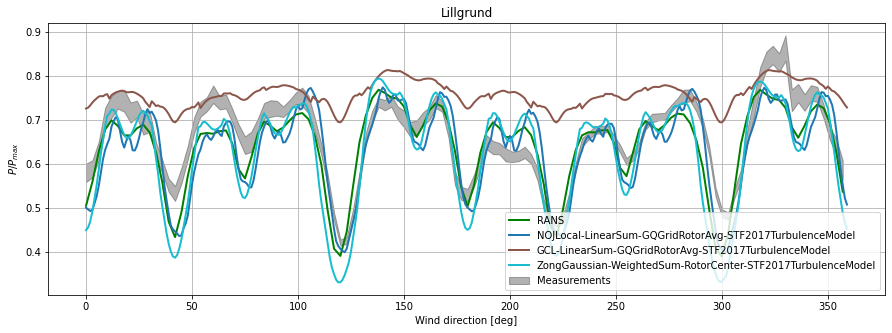

<Figure size 432x288 with 0 Axes>

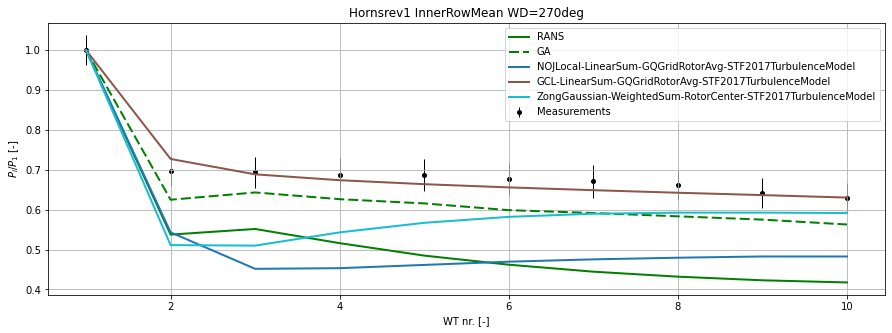

<Figure size 432x288 with 0 Axes>

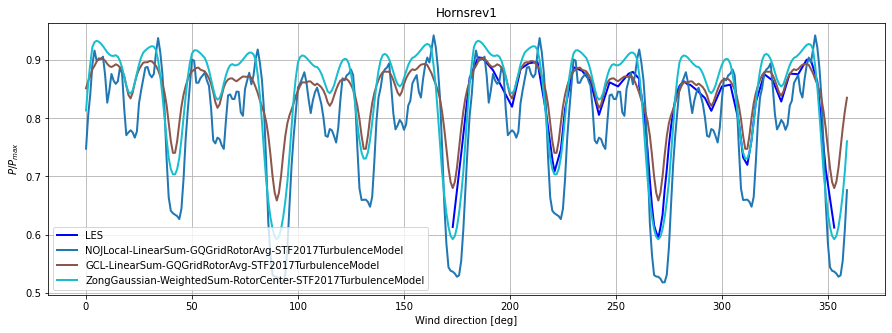

In [12]:
plot_wind_farm(mwc_out)